In [1]:
# Trying to fix the range doppler stuff in here

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift # Might not need this
from radar_ffts import range_doppler_fft, range_doppler_sum
from cfar import cfar, clean_cfar
from radar_functions import get_measurement_parameters, cfar_map, save_range_doppler_map, save_cfar_map, get_data_files
import os

c = 299792458 # metres per second - need this

In [2]:
session2_preface = '../4022S_data/session2/'

tennis_ball_tests = get_data_files(session2_preface) #just using this test
walking_away_test = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5', 'r')

freq_slope_const, number_of_samples_per_chirp, sample_rate, Tdata, bandwidth, range_bin_size = get_measurement_parameters(walking_away_test)

frame_data = walking_away_test[f'Sensors/TI_Radar/Data/Frame_5/frame_data']
fftd_frame_data = range_doppler_fft(frame_data, 0, 0)

plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
print(plotted_fftd_frame_data.dtype)

float64


In [5]:
def make_map(plotted_fftd_frame_data, range_bin_size):
    plt.figure()
    plt.imshow(plotted_fftd_frame_data, aspect='auto', cmap='jet')
    plt.title('Range-Doppler Map')
    plt.xlabel('Range')
    plt.ylabel('Doppler')
    plt.colorbar(label='Power (dB)')
    # Get current y-ticks and labels
    x_ticks = plt.gca().get_xticks()
    plt.gca().set_xticklabels(np.round(x_ticks[::1]*range_bin_size,2)) #TODO: Figure out how to relabel the data, not just the ticks
    plt.show()


def range_doppler_map(hdf5_file_path, frame, make_map_check): # This started as a clone from radar_functions
    
    """Generates a range doppler map of hdf5 radar data. Can generate a plot (make_map = 1) or just the data (make_map = 0)
        -> make_map = 1 plots the heatmap, heat_map = 0 skips it
        -> save_map = 1 saves the map as a png, save_map = 0 skips it"""
    
    frame_data = hdf5_file_path[f'Sensors/TI_Radar/Data/Frame_{frame}/frame_data']
    range_pad = 0
    doppler_pad = 0

    _, _, _, _, _, range_bin_size = get_measurement_parameters(hdf5_file_path)

    fftd_frame_data = range_doppler_fft(frame_data, range_pad, doppler_pad)
    plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
    plotted_fftd_frame_data=np.flip(plotted_fftd_frame_data, 0)

    if make_map_check:
        make_map(np.rot90(plotted_fftd_frame_data), range_bin_size)
#        make_map(plotted_fftd_frame_data, range_bin_size)
        
    return plotted_fftd_frame_data

C:\Users\harry\AppData\Local\Temp\ipykernel_19540\15866374.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(np.round(x_ticks[::1]*range_bin_size,2)) #TODO: Figure out how to relabel the data, not just the ticks


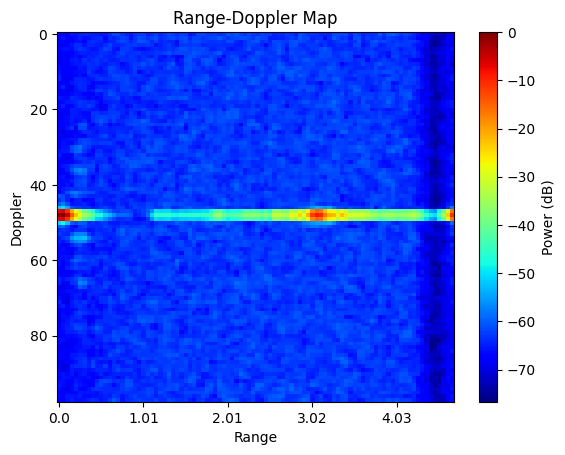

In [6]:
checking = range_doppler_map(tennis_ball_tests[0], 190, True)